Ex1:Analyse the data. Print the shape of our toy dataset. What's the second dimension on X?Print some values of the toy dataset
Shape of input data: (2000, 2)
Shape of target labels: (2000,)
First five rows of input data:
[[ 0.44520512 -0.55836925]
 [-0.6263146   0.81511963]
 [-0.40089411  0.7175086 ]
 [ 0.83092167 -0.62623299]
 [-0.14426604  0.75141345]]
Corresponding target labels:
[1 0 1 0 1]




Ex3:
Using device: cpu
torch.Size([100, 2])


Ex4:


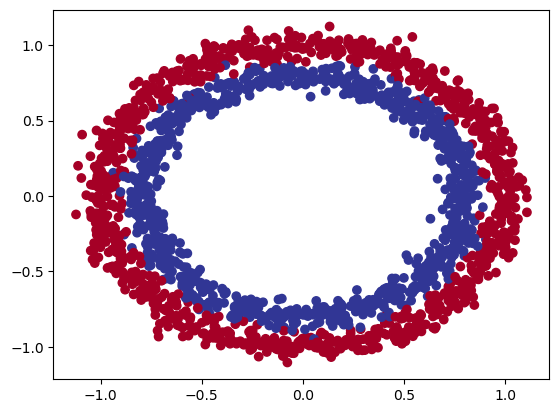

In [13]:
from sklearn.datasets import make_circles
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Make 2000 samples 
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

print("Ex1:Analyse the data. Print the shape of our toy dataset. What's the second dimension on X?Print some values of the toy dataset")
print("Shape of input data:", X.shape)
print("Shape of target labels:", y.shape)

print("First five rows of input data:")
print(X[:5])
print("Corresponding target labels:")
print(y[:5])
print("\n")

"Ex2:"

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible
print("\n")
print("Ex3:")
class TwoLayerLinearPerceptron(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerLinearPerceptron, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x
    
input_size = 2
hidden_size = 10
output_size = 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = TwoLayerLinearPerceptron(input_size, hidden_size, output_size).to(device)

input_data = torch.randn(100, input_size).to(device)
output = model(input_data)
print(output.shape)


print("\n")

# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Visualize with a plot

plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [14]:
print("Ex 4:")

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate toy dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Define model architecture
class TwoLayerLinearPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerLinearPerceptron, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

# Instantiate model
model = TwoLayerLinearPerceptron(input_size=5, hidden_size=10, output_size=1)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Zero gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # Backward pass
    loss.backward()
    optimizer.step()

    # Print loss
    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Evaluate the model
with torch.no_grad():
    model.eval()
    y_pred = (model(X_test) > 0).float()
    accuracy = (y_pred == y_test.view(-1, 1)).float().mean()
    print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

Ex 4:
Epoch [10/100], Loss: 0.5629
Epoch [20/100], Loss: 0.4457
Epoch [30/100], Loss: 0.3969
Epoch [40/100], Loss: 0.3747
Epoch [50/100], Loss: 0.3640
Epoch [60/100], Loss: 0.3586
Epoch [70/100], Loss: 0.3556
Epoch [80/100], Loss: 0.3539
Epoch [90/100], Loss: 0.3530
Epoch [100/100], Loss: 0.3524
Test Accuracy: 88.50%


Ex 5
Epoch [10/100], Loss: 0.6083, Test Accuracy: 86.50%
Epoch [20/100], Loss: 0.4818, Test Accuracy: 86.00%
Epoch [30/100], Loss: 0.4130, Test Accuracy: 86.00%
Epoch [40/100], Loss: 0.3812, Test Accuracy: 86.00%
Epoch [50/100], Loss: 0.3666, Test Accuracy: 86.50%
Epoch [60/100], Loss: 0.3595, Test Accuracy: 86.50%
Epoch [70/100], Loss: 0.3559, Test Accuracy: 86.50%
Epoch [80/100], Loss: 0.3540, Test Accuracy: 87.50%
Epoch [90/100], Loss: 0.3529, Test Accuracy: 87.50%
Epoch [100/100], Loss: 0.3523, Test Accuracy: 88.00%


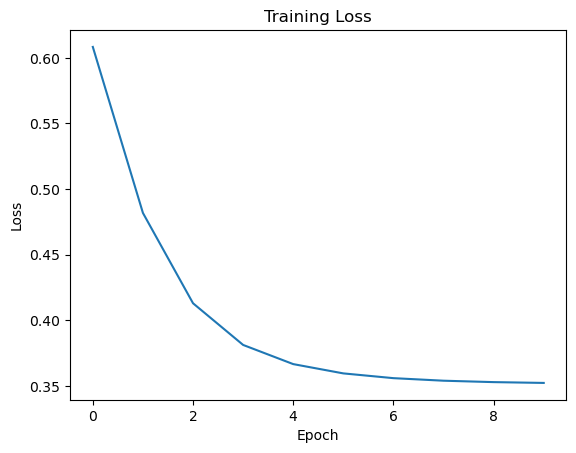

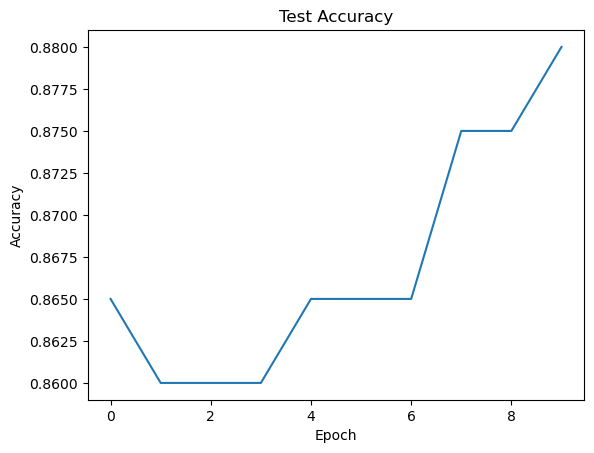

In [15]:
print("Ex 5")
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate toy dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Define model architecture
class TwoLayerLinearPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerLinearPerceptron, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

# Instantiate model
model = TwoLayerLinearPerceptron(input_size=5, hidden_size=10, output_size=1)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Define number of epochs and initialize loss and accuracy curves
num_epochs = 100
loss_curve = []
acc_curve = []

# Train the model
for epoch in range(num_epochs):
    # Zero gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # Backward pass
    loss.backward()
    optimizer.step()

    # Compute accuracy and save loss and accuracy curves
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            model.eval()
            y_pred = (model(X_test) > 0).float()
            accuracy = (y_pred == y_test.view(-1, 1)).float().mean()
            acc_curve.append(accuracy.item())
            loss_curve.append(loss.item())
            print('Epoch [{}/{}], Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(epoch+1, num_epochs, loss.item(), accuracy.item()*100))

# Plot loss and accuracy curves
plt.plot(loss_curve)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(acc_curve)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Ex 6:
Epoch [10/100], Loss: 0.7341, Test Accuracy: 35.00%
Epoch [20/100], Loss: 0.7213, Test Accuracy: 48.50%
Epoch [30/100], Loss: 0.7102, Test Accuracy: 48.50%
Epoch [40/100], Loss: 0.7006, Test Accuracy: 49.00%
Epoch [50/100], Loss: 0.6921, Test Accuracy: 49.50%
Epoch [60/100], Loss: 0.6845, Test Accuracy: 52.00%
Epoch [70/100], Loss: 0.6776, Test Accuracy: 53.50%
Epoch [80/100], Loss: 0.6713, Test Accuracy: 56.00%
Epoch [90/100], Loss: 0.6653, Test Accuracy: 59.00%
Epoch [100/100], Loss: 0.6597, Test Accuracy: 63.50%


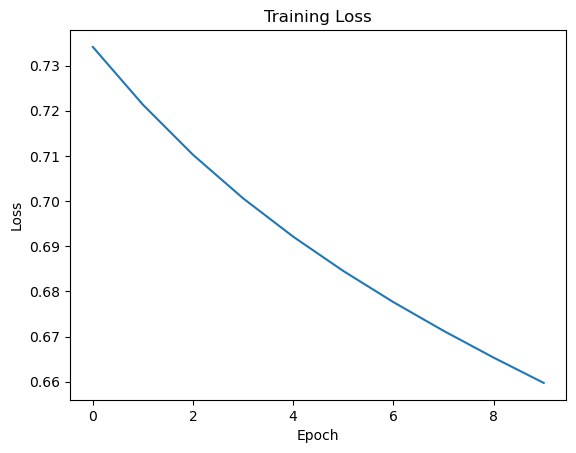

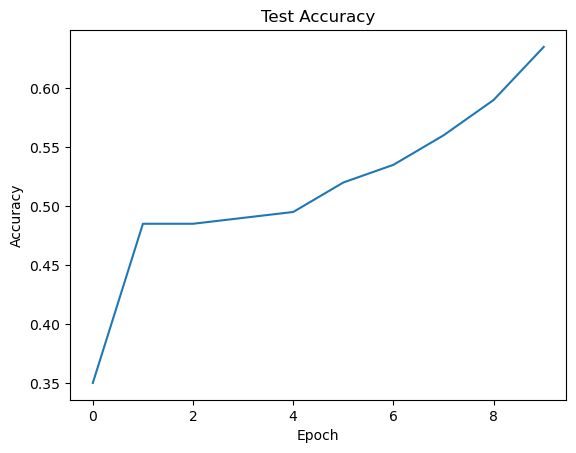

In [17]:
print("Ex 6:")

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate toy dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Define model architecture with non-linear activation functions
class TwoLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerPerceptron, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Instantiate model
model = TwoLayerPerceptron(input_size=5, hidden_size=10, output_size=1)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Define number of epochs and initialize loss and accuracy curves
num_epochs = 100
loss_curve = []
acc_curve = []

# Train the model
for epoch in range(num_epochs):
    # Zero gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # Backward pass
    loss.backward()
    optimizer.step()

    # Compute accuracy and save loss and accuracy curves
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            model.eval()
            y_pred = (model(X_test) > 0.5).float()
            accuracy = (y_pred == y_test.view(-1, 1)).float().mean()
            acc_curve.append(accuracy.item())
            loss_curve.append(loss.item())
            print('Epoch [{}/{}], Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(epoch+1, num_epochs, loss.item(), accuracy.item()*100))

# Plot loss and accuracy curves
plt.plot(loss_curve)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(acc_curve)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Ex 7
Epoch [10/100], Loss: 0.7313, Test Accuracy: 39.50%
Epoch [20/100], Loss: 0.7247, Test Accuracy: 42.00%
Epoch [30/100], Loss: 0.7189, Test Accuracy: 43.50%
Epoch [40/100], Loss: 0.7135, Test Accuracy: 47.00%
Epoch [50/100], Loss: 0.7084, Test Accuracy: 47.50%
Epoch [60/100], Loss: 0.7035, Test Accuracy: 48.50%
Epoch [70/100], Loss: 0.6987, Test Accuracy: 50.50%
Epoch [80/100], Loss: 0.6939, Test Accuracy: 51.50%
Epoch [90/100], Loss: 0.6891, Test Accuracy: 53.00%
Epoch [100/100], Loss: 0.6842, Test Accuracy: 54.00%


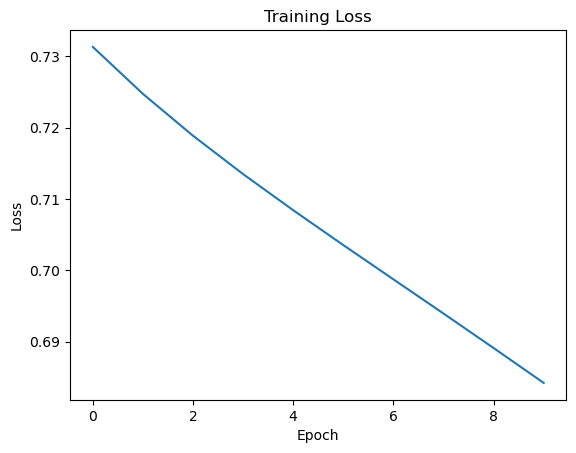

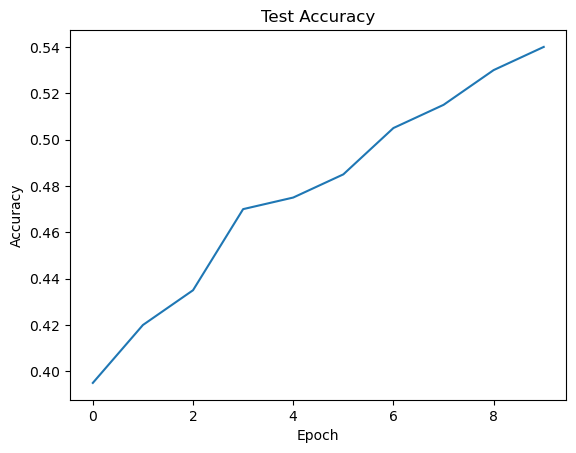

In [18]:
print("Ex 7, 8")

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate toy dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Define model architecture with non-linear activation functions
class TwoLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerPerceptron, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Instantiate model
model = TwoLayerPerceptron(input_size=5, hidden_size=10, output_size=1)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Define number of epochs and initialize loss and accuracy curves
num_epochs = 100
loss_curve = []
acc_curve = []

# Train the model
for epoch in range(num_epochs):
    # Zero gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # Backward pass
    loss.backward()
    optimizer.step()

    # Compute accuracy and save loss and accuracy curves
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            model.eval()
            y_pred = (model(X_test) > 0.5).float()
            accuracy = (y_pred == y_test.view(-1, 1)).float().mean()
            acc_curve.append(accuracy.item())
            loss_curve.append(loss.item())
            print('Epoch [{}/{}], Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(epoch+1, num_epochs, loss.item(), accuracy.item()*100))

# Plot loss and accuracy curves
plt.plot(loss_curve)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(acc_curve)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Ex 9:
Epoch 0: Loss=0.0113, Accuracy=0.995000
Epoch 10: Loss=0.0113, Accuracy=0.995000
Epoch 20: Loss=0.0113, Accuracy=0.995000
Epoch 30: Loss=0.0113, Accuracy=0.995000
Epoch 40: Loss=0.0113, Accuracy=0.995000
Epoch 50: Loss=0.0113, Accuracy=0.995000
Epoch 60: Loss=0.0113, Accuracy=0.995000
Epoch 70: Loss=0.0112, Accuracy=0.995000
Epoch 80: Loss=0.0112, Accuracy=0.995000
Epoch 90: Loss=0.0112, Accuracy=0.995000
Epoch 100: Loss=0.0112, Accuracy=0.995000
Epoch 110: Loss=0.0112, Accuracy=0.995000
Epoch 120: Loss=0.0112, Accuracy=0.995000
Epoch 130: Loss=0.0112, Accuracy=0.995000
Epoch 140: Loss=0.0111, Accuracy=0.995000
Epoch 150: Loss=0.0111, Accuracy=0.995000
Epoch 160: Loss=0.0111, Accuracy=0.995000
Epoch 170: Loss=0.0111, Accuracy=0.995000
Epoch 180: Loss=0.0111, Accuracy=0.995000
Epoch 190: Loss=0.0111, Accuracy=0.995000
Epoch 200: Loss=0.0111, Accuracy=0.995000
Epoch 210: Loss=0.0111, Accuracy=0.995000
Epoch 220: Loss=0.0110, Accuracy=0.995000
Epoch 230: Loss=0.0110, Accuracy=0.9950

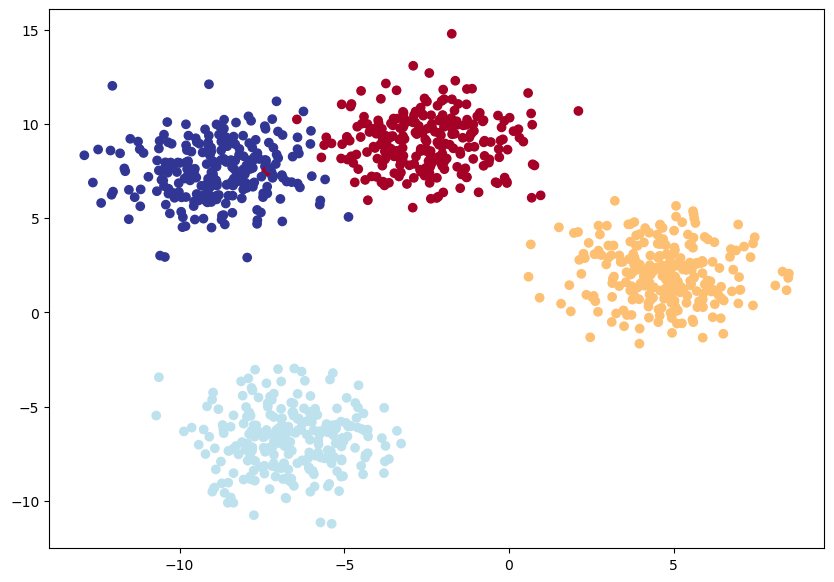

In [30]:
print("Ex 9:")

# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

class MultiClassModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 1000
loss_curve = []
acc_curve = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_blob_train)
    loss = criterion(outputs, y_blob_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        with torch.no_grad():
            outputs = model(X_blob_test)
            loss = criterion(outputs, y_blob_test)
            _, predicted = torch.max(outputs.data, 1)
            total = y_blob_test.size(0)
            correct = (predicted == y_blob_test).sum().item()
            accuracy = 100 * correct / total
            loss_curve.append(loss.item())
            acc_curve.append(accuracy)
            print(f"Epoch {epoch}: Loss={loss.item():.4f}, Accuracy={accuracy/100:2f}")